In [12]:
import pandas as pd
import seaborn as sns
import numpy as np

In [6]:
old = pd.read_csv('https://raw.githubusercontent.com/niteen11/DataAnalyticsAcademy/master/Python/dataset_diabetes/diabetic_data.csv')

In [7]:
old.head()
#there seems to be a lot of diabetes information, let's try to determine which factors impact diabetes
#we see race and gender, and whether or not there is a medication for diabetes, let's look at how all of that impacts readmissions for diabetes

,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,payer_code,medical_specialty,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,diag_1,diag_2,diag_3,number_diagnoses,max_glu_serum,A1Cresult,metformin,repaglinide,nateglinide,chlorpropamide,glimepiride,acetohexamide,glipizide,glyburide,tolbutamide,pioglitazone,rosiglitazone,acarbose,miglitol,troglitazone,tolazamide,examide,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,2278392,8222157,Caucasian,Female,[0-10),?,6,25,1,1,?,Pediatrics-Endocrinology,41,0,1,0,0,0,250.83,?,?,1,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,NO
1,149190,55629189,Caucasian,Female,[10-20),?,1,1,7,3,?,?,59,0,18,0,0,0,276,250.01,255,9,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Up,No,No,No,No,No,Ch,Yes,>30
2,64410,86047875,AfricanAmerican,Female,[20-30),?,1,1,7,2,?,?,11,5,13,2,0,1,648,250,V27,6,None,None,No,No,No,No,No,No,Steady,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Yes,NO
3,500364,82442376,Caucasian,Male,[30-40),?,1,1,7,2,?,?,44,1,16,0,0,0,8,250.43,403,7,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Up,No,No,No,No,No,Ch,Yes,NO
4,16680,42519267,Caucasian,Male,[40-50),?,1,1,7,1,?,?,51,0,8,0,0,0,197,157,250,5,None,None,No,No,No,No,No,No,Steady,No,No,No,No,No,No,No,No,No,No,Steady,No,No,No,No,No,Ch,Yes,NO


In [8]:
new = old[['patient_nbr','race','gender','diag_1','num_procedures','diabetesMed','readmitted']].copy()
#keeping only the relevant columns, removing the rest
new.rename(columns={"patient_nbr": "ID", "diag_1": "diagnosis","num_procedures" : "procedure_count"},inplace= True)
#renaming columns for ease of use and clarity
new.head()

,ID,race,gender,diagnosis,procedure_count,diabetesMed,readmitted
0,8222157,Caucasian,Female,250.83,0,No,NO
1,55629189,Caucasian,Female,276,0,Yes,>30
2,86047875,AfricanAmerican,Female,648,5,Yes,NO
3,82442376,Caucasian,Male,8,1,Yes,NO
4,42519267,Caucasian,Male,197,0,Yes,NO


In [9]:
#the ICD 9 diagnosis code for diabetes is any code begining with "250" 
#as a result we filter the dataframe down by searching for the string "250" in the diagnosis code column and save as a new dataframe
df = new.loc[new['diagnosis'].str.contains('250', case=False)]
df.head()
#we now have a table of diabetes related events

,ID,race,gender,diagnosis,procedure_count,diabetesMed,readmitted
0,8222157,Caucasian,Female,250.83,0,No,NO
10,89869032,AfricanAmerican,Female,250.7,2,Yes,>30
52,37746639,AfricanAmerican,Female,250.6,2,Yes,>30
56,93232917,AfricanAmerican,Female,250.7,2,Yes,>30
60,63754317,AfricanAmerican,Female,250.4,2,Yes,>30


In [10]:
#we will create a pivot table for the non-numeric data we want to draw inferences on
#I would like to see the result of gender and race on number of procedures
pivot_table = df.pivot_table(index=['ID'],
                                     columns=['race','gender'], 
                                     values=['procedure_count'],
                                     aggfunc=lambda x: ' '.join(x))
print(pivot_table)
#looking at the useless pivot table below yields endless sadness and I long for an excel pivot table
#research on stack overflos tells me that trying to get insights from non-numeric data is extremely complicated in python, awesome
#so I decided to give up and do something much simpler so I could move on with my life

/usr/local/lib/python3.7/dist-packages/pandas/core/reshape/pivot.py:165: FutureWarning: Dropping invalid columns in DataFrameGroupBy.agg is deprecated. In a future version, a TypeError will be raised. Before calling .agg, select only columns which should be valid for the aggregating function.
  agged = grouped.agg(aggfunc)


race           ?       ...  Other     
gender    Female Male  ... Female Male
ID                     ...            
5220         NaN  NaN  ...    NaN  NaN
8154         NaN  NaN  ...    NaN  NaN
14499        NaN  NaN  ...    NaN  NaN
20295        NaN  NaN  ...    NaN  NaN
24030        NaN  NaN  ...    NaN  NaN
...          ...  ...  ...    ...  ...
188081483    NaN  NaN  ...    NaN  NaN
188323403    NaN  NaN  ...    NaN  NaN
188755646    NaN  NaN  ...    NaN  NaN
189215762    NaN  NaN  ...    NaN  NaN
189332087    NaN  NaN  ...    NaN  NaN

[7147 rows x 12 columns]


In [27]:
from numpy.core.arrayprint import array2string
new.groupby('race').ID.count()
array1 = np.array([2273,19210,641,76099,2037,1506])
#using the groupby function I am looking for counts by race for the overall data set and then for the diabetes data set
#I am then putting them into numpy arrays so I can divide them and determine the percentages for each race
#you would think there would be an easier way to do this but alas this is what stack overflow recommended
df.groupby('race').ID.count()

race
?                   189
AfricanAmerican    2492
Asian                35
Caucasian          5690
Hispanic            218
Other               133
Name: ID, dtype: int64

In [32]:
array2 = np.array([189,2492,35,5690,218,133])
array3 = np.divide(array2,array1)
races = ['?','AA','Asian','Cauc','Hisp','Other']
results = pd.DataFrame({'Percent':[array3]}, index = races)
results.head()
#I had hoped that I could use an array as data in a data frame but it turns out that even that is asking too much
#this begs the question: if everything needs to be done manually and with long complicated syntax why would one ever use this software? 
#which provides valuable insight into why excel is the industry standard and not this

,Percent
?,"[0.08315002199736031, 0.1297241020301926, 0.05..."
AA,"[0.08315002199736031, 0.1297241020301926, 0.05..."
Asian,"[0.08315002199736031, 0.1297241020301926, 0.05..."
Cauc,"[0.08315002199736031, 0.1297241020301926, 0.05..."
Hisp,"[0.08315002199736031, 0.1297241020301926, 0.05..."


In [41]:
#after more research online, trying a new method
results2 = pd.DataFrame(index = races)
results2['Percent with Diabetes'] = array3.tolist()
print(results2)

       Percent with Diabetes
?                   0.083150
AA                  0.129724
Asian               0.054602
Cauc                0.074771
Hisp                0.107020
Other               0.088313


In [42]:
#some more reserach to determine how to format a df column to show numbers as a percent and we eventually get 
results2.style.format({
    'Percent with Diabetes': '{:,.2%}'.format,
})
#finally we are able to see which race has the most diabetic diagnoses

,Percent with Diabetes
?,8.32%
AA,12.97%
Asian,5.46%
Cauc,7.48%
Hisp,10.70%
Other,8.83%


       Total Events  Diabetes Events
?              2273              189
AA            19210             2492
Asian           641               35
Cauc          76099             5690
Hisp           2037              218
Other          1506              133


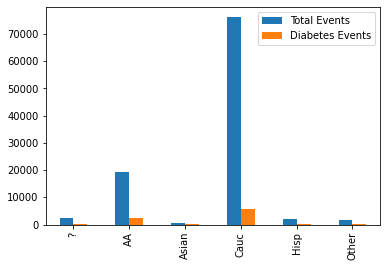

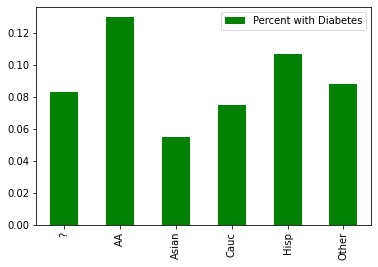

In [48]:
#let's plot these things
final = pd.DataFrame(index = races)
final['Total Events'] = array1.tolist()
final['Diabetes Events'] = array2.tolist()
print(final)
final.plot.bar()
results2.plot.bar(color = 'green')

In [ ]:
#We can finally draw some insights for the factor of "race"
#We can see that the vast majority of patients served are caucasian
#however our percentages tell us of those being served, caucasians are less likely to have diabetes
#African Americans and Hispanics have the highest rate of diabetes and Asians have the lowest
#This likley shows a genetic root cause but still enables us to move forward with targeted care aimed at leveling out those imbalances
#THE MAIN ISSUE IS THAT IT TOOK 33 LINES OF CODE AND HOURS OF RESEARCH/ TRIAL AND ERROR TO GET TO THIS EXTREMELY BASIC INSIGHT
#ADDING ADDITIONAL DATA LIKE READMISSIONS OR ADDITIONAL FACTORS SUCH AS GENDER WOULD ADD MUCH MORE TIME NEEDED TO COMPLETE THIS WORK
#AT THE END OF THE DAY THIS IS TOO MUCH WORK FOR SIMPLE CALCULI AND ELEMENTARY INSIGHTS